In [258]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [259]:
df=pd.read_csv('mushroom.csv')

In [260]:
df

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat,classes
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [261]:
df.shape

(8124, 23)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   capshape               8124 non-null   object
 1   capsurface             8124 non-null   object
 2   capcolor               8124 non-null   object
 3   bruises                8124 non-null   object
 4   odor                   8124 non-null   object
 5   gillattachment         8124 non-null   object
 6   gillspacing            8124 non-null   object
 7   gillsize               8124 non-null   object
 8   gillcolor              8124 non-null   object
 9   stalkshape             8124 non-null   object
 10  stalkroot              8124 non-null   object
 11  stalksurfaceabovering  8124 non-null   object
 12  stalksurfacebelowring  8124 non-null   object
 13  stalkcolorabovering    8124 non-null   object
 14  stalkcolorbelowring    8124 non-null   object
 15  veiltype             

In [263]:
df.isnull()

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat,classes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [264]:
df.isnull().sum()

capshape                 0
capsurface               0
capcolor                 0
bruises                  0
odor                     0
gillattachment           0
gillspacing              0
gillsize                 0
gillcolor                0
stalkshape               0
stalkroot                0
stalksurfaceabovering    0
stalksurfacebelowring    0
stalkcolorabovering      0
stalkcolorbelowring      0
veiltype                 0
veilcolor                0
ringnumber               0
ringtype                 0
sporeprintcolor          0
population               0
habitat                  0
classes                  0
dtype: int64

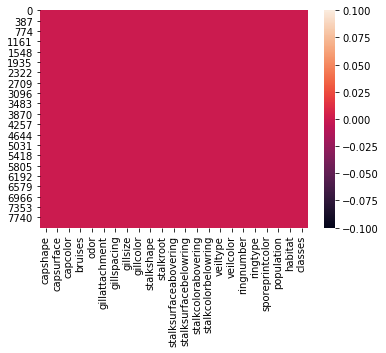

In [265]:
sns.heatmap(df.isnull())

In [266]:
df.dtypes

capshape                 object
capsurface               object
capcolor                 object
bruises                  object
odor                     object
gillattachment           object
gillspacing              object
gillsize                 object
gillcolor                object
stalkshape               object
stalkroot                object
stalksurfaceabovering    object
stalksurfacebelowring    object
stalkcolorabovering      object
stalkcolorbelowring      object
veiltype                 object
veilcolor                object
ringnumber               object
ringtype                 object
sporeprintcolor          object
population               object
habitat                  object
classes                  object
dtype: object

In [267]:
df['classes'].unique()

array(['p', 'e'], dtype=object)

In [268]:
df['odor'].unique()

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

In [269]:
df.shape

(8124, 23)

In [270]:
df.head()

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat,classes
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [271]:
from sklearn.preprocessing import LabelEncoder

In [272]:
le=LabelEncoder()

In [273]:
df['classes']=le.fit_transform(df.classes)

In [274]:
df.head(5)


,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat,classes
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,1
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,0
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,0
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,1
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,0


In [275]:
df.columns

Index(['capshape', 'capsurface', 'capcolor', 'bruises', 'odor',
       'gillattachment', 'gillspacing', 'gillsize', 'gillcolor', 'stalkshape',
       'stalkroot', 'stalksurfaceabovering', 'stalksurfacebelowring',
       'stalkcolorabovering', 'stalkcolorbelowring', 'veiltype', 'veilcolor',
       'ringnumber', 'ringtype', 'sporeprintcolor', 'population', 'habitat',
       'classes'],
      dtype='object')

In [276]:
from sklearn.preprocessing import LabelEncoder

In [277]:
le=LabelEncoder()

In [278]:
df.odor=le.fit_transform(df.odor)
df.capshape=le.fit_transform(df.capshape)
df.capsurface=le.fit_transform(df.capsurface)
df.capcolor=le.fit_transform(df.capcolor)
df.bruises=le.fit_transform(df.bruises)
df.gillattachment=le.fit_transform(df.gillattachment)
df.gillspacing=le.fit_transform(df.gillspacing)
df.gillsize=le.fit_transform(df.gillsize)
df.gillcolor=le.fit_transform(df.gillcolor)
df.stalkshape=le.fit_transform(df.stalkshape)
df.stalkroot=le.fit_transform(df.stalkroot)
df.stalksurfaceabovering=le.fit_transform(df.stalksurfaceabovering)
df.stalksurfacebelowring=le.fit_transform(df.stalksurfacebelowring)
df.stalkcolorabovering=le.fit_transform(df.stalkcolorabovering)
df.stalkcolorbelowring=le.fit_transform(df.stalkcolorbelowring)
df.veiltype=le.fit_transform(df.veiltype)
df.veilcolor=le.fit_transform(df.veilcolor)
df.ringnumber=le.fit_transform(df.ringnumber)
df.ringtype=le.fit_transform(df.ringtype)
df.sporeprintcolor=le.fit_transform(df.sporeprintcolor)
df.population=le.fit_transform(df.population)
df.habitat=le.fit_transform(df.habitat)


In [279]:
df.head(5)

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat,classes
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


In [280]:
df.classes.unique()

array([1, 0])

In [281]:
df.describe()

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat,classes
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616,0.482029
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975,0.499708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000,0.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000,1.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


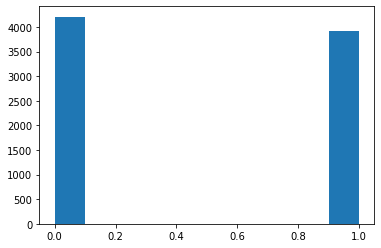

In [282]:
plt.hist(x='classes',bins=10,data=df)
plt.show()

In [283]:
df.skew()

capshape                -0.247052
capsurface              -0.590859
capcolor                 0.706965
bruises                  0.342750
odor                    -0.080790
gillattachment          -5.977076
gillspacing              1.840088
gillsize                 0.825797
gillcolor                0.061410
stalkshape              -0.271345
stalkroot                0.947852
stalksurfaceabovering   -1.098739
stalksurfacebelowring   -0.757703
stalkcolorabovering     -1.835434
stalkcolorbelowring     -1.791593
veiltype                 0.000000
veilcolor               -6.946944
ringnumber               2.701657
ringtype                -0.290018
sporeprintcolor          0.548426
population              -1.413096
habitat                  0.985548
classes                  0.071946
dtype: float64

In [284]:
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [285]:
df.skew()

capshape                -0.247052
capsurface              -0.590859
capcolor                -0.365280
bruises                  0.342750
odor                    -0.080790
gillattachment          -5.977076
gillspacing              1.840088
gillsize                 0.825797
gillcolor                0.061410
stalkshape              -0.271345
stalkroot                0.129453
stalksurfaceabovering   -1.098739
stalksurfacebelowring   -0.757703
stalkcolorabovering     -1.835434
stalkcolorbelowring     -1.791593
veiltype                 0.000000
veilcolor               -6.946944
ringnumber               1.481287
ringtype                -0.290018
sporeprintcolor          0.548426
population              -1.413096
habitat                  0.342186
classes                  0.071946
dtype: float64

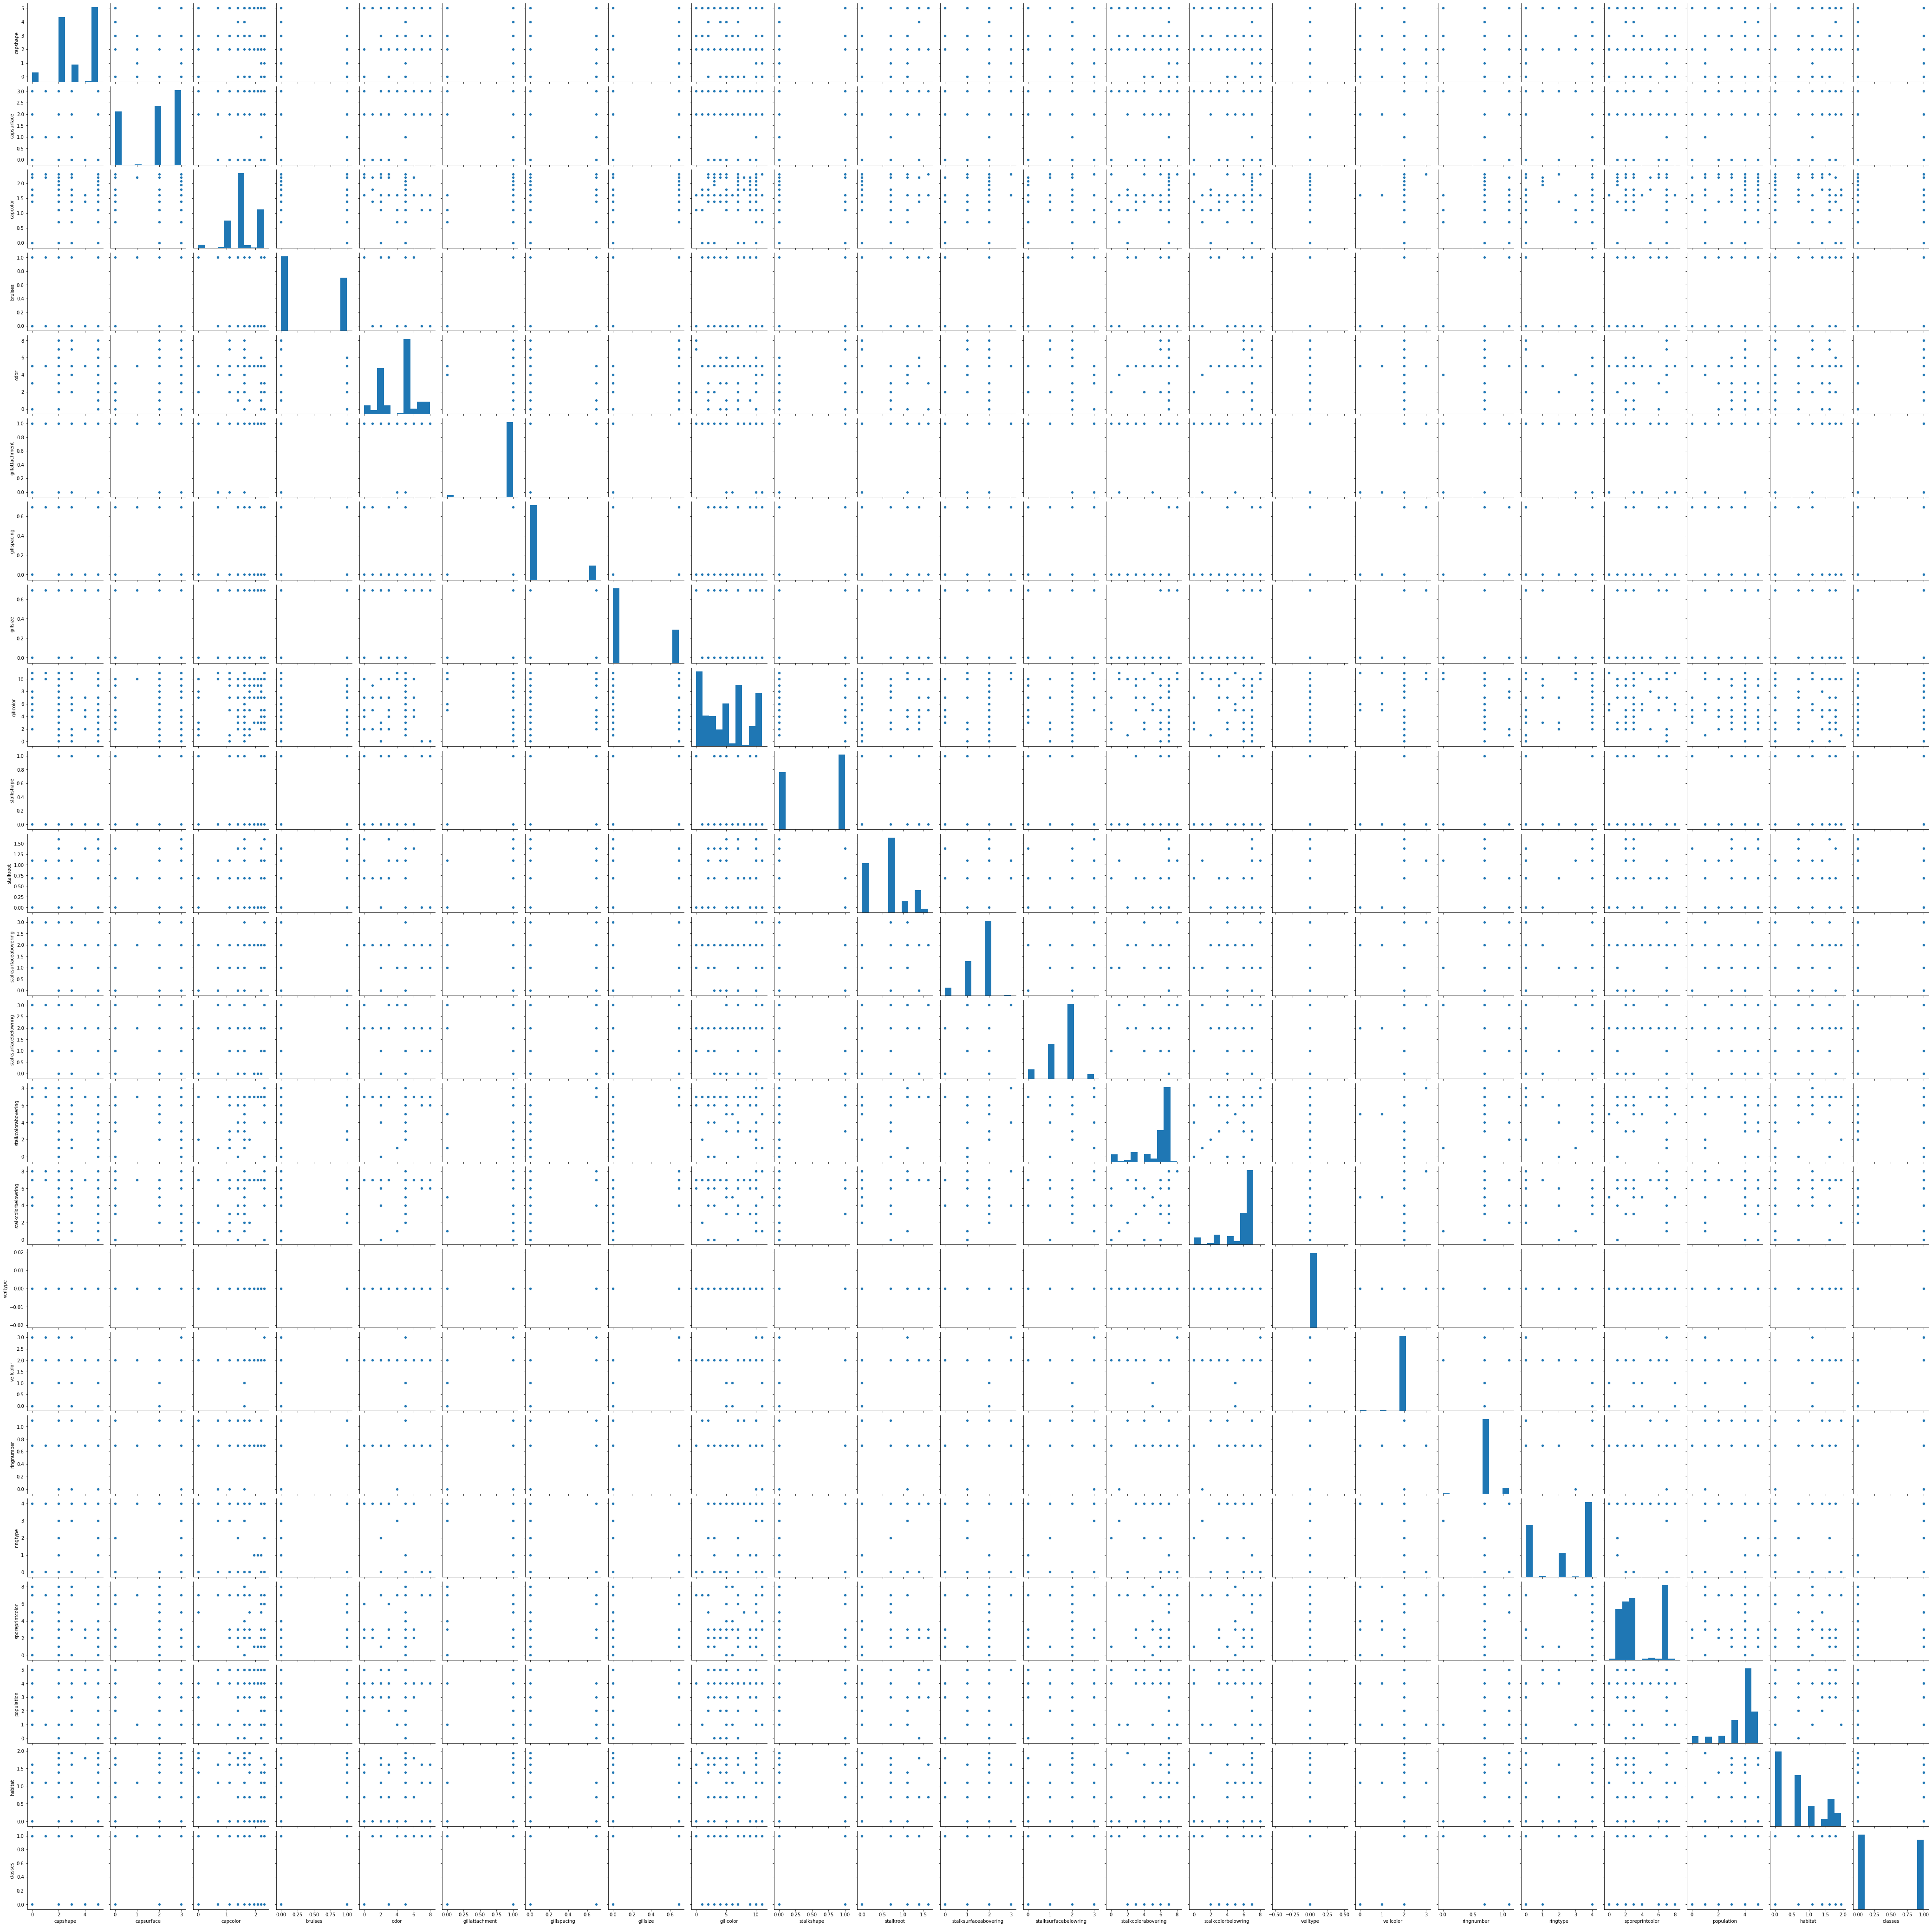

In [286]:
sns.pairplot(df)

In [287]:
df.columns

Index(['capshape', 'capsurface', 'capcolor', 'bruises', 'odor',
       'gillattachment', 'gillspacing', 'gillsize', 'gillcolor', 'stalkshape',
       'stalkroot', 'stalksurfaceabovering', 'stalksurfacebelowring',
       'stalkcolorabovering', 'stalkcolorbelowring', 'veiltype', 'veilcolor',
       'ringnumber', 'ringtype', 'sporeprintcolor', 'population', 'habitat',
       'classes'],
      dtype='object')

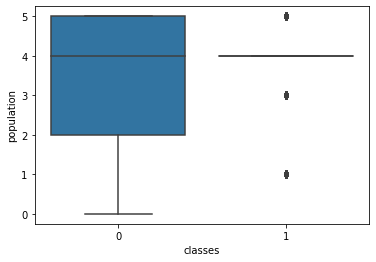

In [288]:
sns.boxplot(x='classes',y='population',data=df)

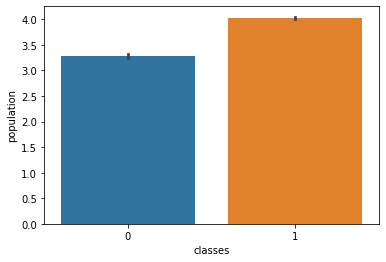

In [289]:
sns.barplot(x='classes',y='population',data=df)

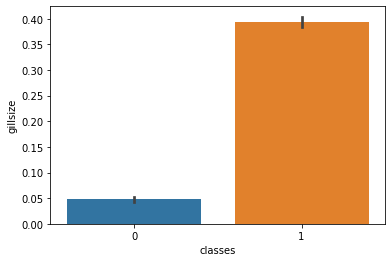

In [290]:
sns.barplot(x='classes',y='gillsize',data=df)

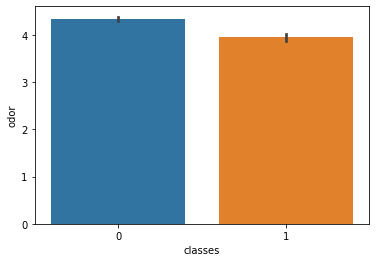

In [291]:
sns.barplot(x='classes',y='odor',data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028093973E88>,
      dtype=object)

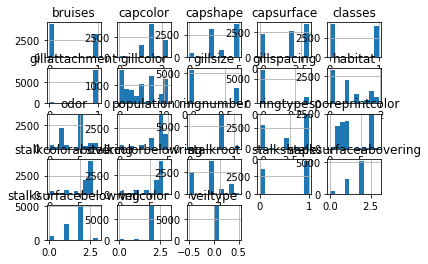

In [292]:
df.hist()

capshape                    AxesSubplot(0.125,0.799681;0.133621x0.0803191)
capsurface               AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
capcolor                  AxesSubplot(0.44569,0.799681;0.133621x0.0803191)
bruises                  AxesSubplot(0.606034,0.799681;0.133621x0.0803191)
odor                     AxesSubplot(0.766379,0.799681;0.133621x0.0803191)
gillattachment              AxesSubplot(0.125,0.703298;0.133621x0.0803191)
gillspacing              AxesSubplot(0.285345,0.703298;0.133621x0.0803191)
gillsize                  AxesSubplot(0.44569,0.703298;0.133621x0.0803191)
gillcolor                AxesSubplot(0.606034,0.703298;0.133621x0.0803191)
stalkshape               AxesSubplot(0.766379,0.703298;0.133621x0.0803191)
stalkroot                   AxesSubplot(0.125,0.606915;0.133621x0.0803191)
stalksurfaceabovering    AxesSubplot(0.285345,0.606915;0.133621x0.0803191)
stalksurfacebelowring     AxesSubplot(0.44569,0.606915;0.133621x0.0803191)
stalkcolorabovering      

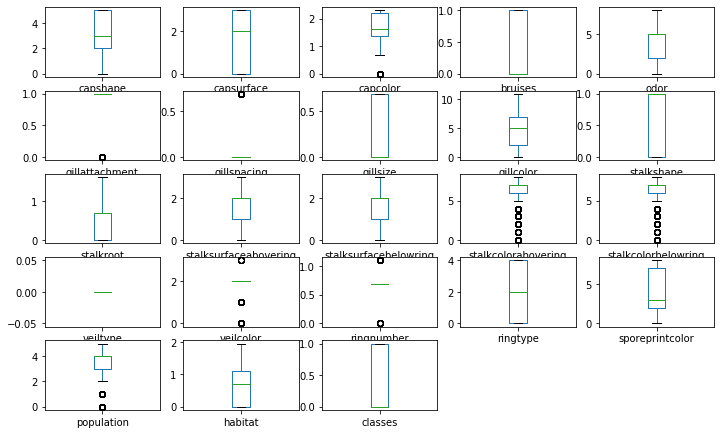

In [293]:
df.plot(kind='box',subplots=True,layout=(8,5),figsize=(12,12))

In [294]:
df.drop('stalkcolorbelowring',axis=1,inplace=True)

In [295]:
df.drop('stalkcolorabovering',axis=1,inplace=True)

In [296]:
df_new=df[(z<3).all(axis=1)]

In [297]:
df.shape

(8124, 21)

In [298]:
df_new.shape

(0, 21)

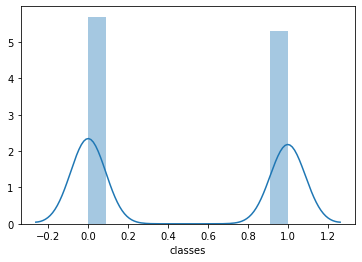

In [299]:
sns.distplot(df['classes'])

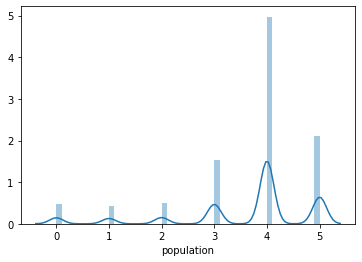

In [300]:
sns.distplot(df['population'])

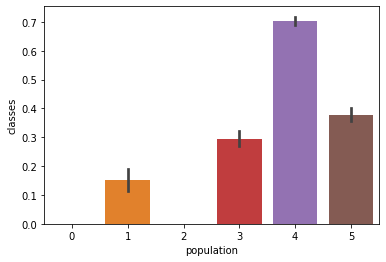

In [301]:
sns.barplot(x='population',y='classes',data=df)

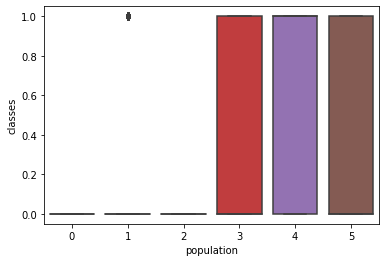

In [302]:
sns.boxplot(x='population',y='classes',data=df)

In [303]:
df

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalksurfaceabovering,stalksurfacebelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat,classes
0,5,2,1.609438,1,6,1,0.000000,0.693147,4,0,...,2,2,0,2,0.693147,4,2,3,1.791759,1
1,5,2,2.302585,1,0,1,0.000000,0.000000,4,0,...,2,2,0,2,0.693147,4,3,2,0.693147,0
2,0,2,2.197225,1,3,1,0.000000,0.000000,5,0,...,2,2,0,2,0.693147,4,3,2,1.386294,0
3,5,3,2.197225,1,6,1,0.000000,0.693147,5,0,...,2,2,0,2,0.693147,4,2,3,1.791759,1
4,5,2,1.386294,0,5,1,0.693147,0.000000,4,1,...,2,2,0,2,0.693147,0,3,0,0.693147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,1.609438,0,5,0,0.000000,0.000000,11,0,...,2,2,0,1,0.693147,4,0,1,1.098612,0
8120,5,2,1.609438,0,5,0,0.000000,0.000000,11,0,...,2,2,0,0,0.693147,4,0,4,1.098612,0
8121,2,2,1.609438,0,5,0,0.000000,0.000000,5,0,...,2,2,0,1,0.693147,4,0,1,1.098612,0
8122,3,3,1.609438,0,8,1,0.000000,0.693147,0,1,...,2,1,0,2,0.693147,0,7,4,1.098612,1


In [304]:
df[2:5]

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalksurfaceabovering,stalksurfacebelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat,classes
2,0,2,2.197225,1,3,1,0.000000,0.000000,5,0,...,2,2,0,2,0.693147,4,3,2,1.386294,0
3,5,3,2.197225,1,6,1,0.000000,0.693147,5,0,...,2,2,0,2,0.693147,4,2,3,1.791759,1
4,5,2,1.386294,0,5,1,0.693147,0.000000,4,1,...,2,2,0,2,0.693147,0,3,0,0.693147,0


In [319]:
X=df.iloc[:,0:-1]
X

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,stalkroot,stalksurfaceabovering,stalksurfacebelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,5,2,1.609438,1,6,1,0.000000,0.693147,4,0,1.386294,2,2,0,2,0.693147,4,2,3,1.791759
1,5,2,2.302585,1,0,1,0.000000,0.000000,4,0,1.098612,2,2,0,2,0.693147,4,3,2,0.693147
2,0,2,2.197225,1,3,1,0.000000,0.000000,5,0,1.098612,2,2,0,2,0.693147,4,3,2,1.386294
3,5,3,2.197225,1,6,1,0.000000,0.693147,5,0,1.386294,2,2,0,2,0.693147,4,2,3,1.791759
4,5,2,1.386294,0,5,1,0.693147,0.000000,4,1,1.386294,2,2,0,2,0.693147,0,3,0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,1.609438,0,5,0,0.000000,0.000000,11,0,0.000000,2,2,0,1,0.693147,4,0,1,1.098612
8120,5,2,1.609438,0,5,0,0.000000,0.000000,11,0,0.000000,2,2,0,0,0.693147,4,0,4,1.098612
8121,2,2,1.609438,0,5,0,0.000000,0.000000,5,0,0.000000,2,2,0,1,0.693147,4,0,1,1.098612
8122,3,3,1.609438,0,8,1,0.000000,0.693147,0,1,0.000000,2,1,0,2,0.693147,0,7,4,1.098612


In [328]:
Y=df.iloc[:,-1]
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: classes, dtype: int32

In [329]:
X.shape

(8124, 20)

In [330]:
Y.shape

(8124,)

In [350]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=48)

In [351]:
mnb=MultinomialNB()
mnb.fit(X_train,Y_train)
mnb.score(X_train,Y_train)
predmnb=mnb.predict(X_test)
print(accuracy_score(Y_test,predmnb))
print(confusion_matrix(Y_test,predmnb))
print(classification_report(Y_test,predmnb))

0.8030526834071886
[[967  81]
 [319 664]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.83      1048
           1       0.89      0.68      0.77       983

    accuracy                           0.80      2031
   macro avg       0.82      0.80      0.80      2031
weighted avg       0.82      0.80      0.80      2031



In [352]:
svc=SVC(kernel='poly')
svc.fit(X_train,Y_train)
svc.score(X_train,Y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

0.9871984244214672
[[1042    6]
 [  20  963]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1048
           1       0.99      0.98      0.99       983

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



In [353]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtc.score(X_train,Y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(Y_test,preddtc))
print(confusion_matrix(Y_test,preddtc))
print(classification_report(Y_test,preddtc))

1.0
[[1048    0]
 [   0  983]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1048
           1       1.00      1.00      1.00       983

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [354]:
dt=KNeighborsClassifier()
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
preddt=dt.predict(X_test)
print(accuracy_score(Y_test,preddt))
print(confusion_matrix(Y_test,preddt))
print(classification_report(Y_test,preddt))

0.9975381585425899
[[1044    4]
 [   1  982]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1048
           1       1.00      1.00      1.00       983

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [355]:
from sklearn.model_selection import cross_val_score
mnb1=MultinomialNB()
score=cross_val_score(mnb1,X,Y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.57708872 0.67700258 0.67355728 0.71403962 0.95948276 0.89051724
 0.82931034]
0.7601426492364745
0.126243365869393


In [356]:
sv=SVC()
score=cross_val_score(sv,X,Y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.77260982 0.99913867 0.9870801  0.89664083 0.99137931 0.99396552
 0.54224138]
0.8832936614011192
0.15895559957140934


In [358]:
from sklearn.externals import joblib
joblib.dump(dtc,'mushroom_dataset_dtcfile.obj')

['mushroom_dataset_dtcfile.obj']